In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from pandas_profiling import ProfileReport 

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/skinan/Improved-Sampling-and-Feature-Selection-to-Support-Extreme-Gradient-Boosting-For-PCOS-Diagnosis/main/datasets/PCOS_data_without_infertility.csv')
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,#NAME?,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,#NAME?,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,#NAME?,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,#NAME?,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


In [3]:
df = df.drop(columns=['Sl. No','Patient File No.','Unnamed: 44'])

In [4]:
df.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           1
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg) 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    object 
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [6]:
for i in df:
    columnSeriesObj = df[i]
    df[i] = pd.to_numeric(df[i], errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     242 non-null    float64
 5   Blood Group             541 non-null    int64  
 6   Pulse rate(bpm)         541 non-null    int64  
 7   RR (breaths/min)        541 non-null    int64  
 8   Hb(g/dl)                541 non-null    float64
 9   Cycle(R/I)              541 non-null    int64  
 10  Cycle length(days)      541 non-null    int64  
 11  Marraige Status (Yrs)   540 non-null    float64
 12  Pregnant(Y/N)           541 non-null    int64  
 13  No. of aborptions       541 non-null    int64  
 14    I   beta-HCG(mIU/mL)  541 non-null    fl

In [8]:
df.isna().sum()

PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      1
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  1
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(Y/N)              0
Pimples(Y/N)                0
Fast food 

In [9]:
df = df.drop(columns = ['BMI','FSH/LH','Waist:Hip Ratio'])

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     0
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
Hip(inch)                 0
Waist(inch)               0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Fast food (Y/N)           0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)      0
Follicle No. (L)          0
Follicle No. (R)    

In [10]:
# ProfileReport(df)

In [14]:
#Data Visualization
# sns.pairplot(df.iloc[:,1:])

In [18]:
def plot_hist(variable):
    plt.figure(figsize = (9,3) )
    plt.hist ( df [variable], bins = 50)
    plt.xlabel (variable )
    plt.ylabel("Frequency" )
#     plt.title("() distribution with hist", format(variable) )
    plt.show ( )

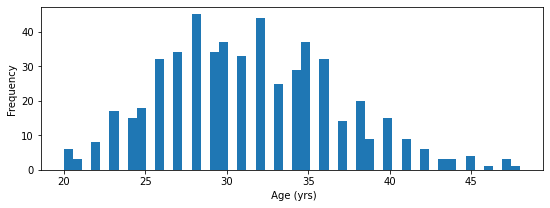

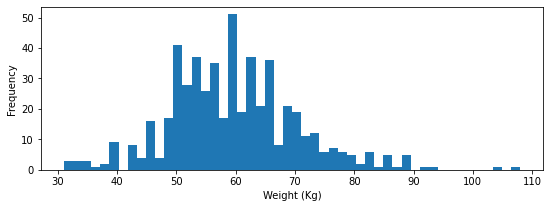

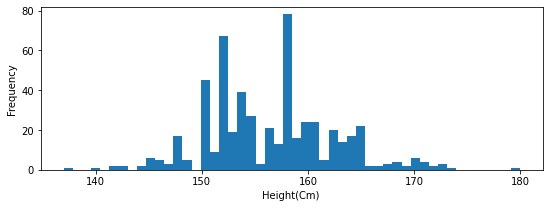

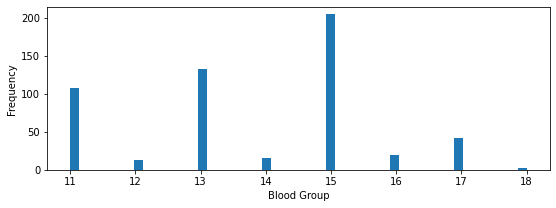

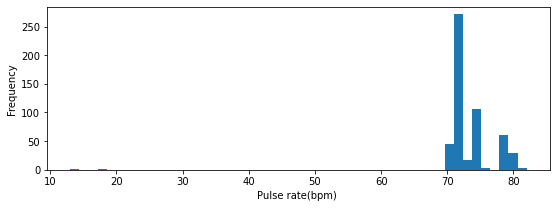

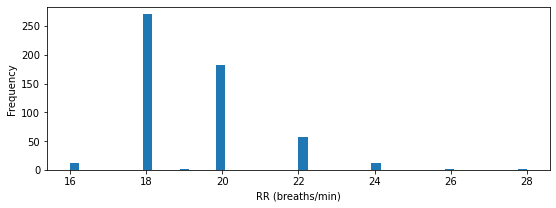

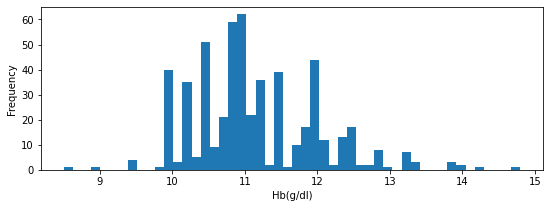

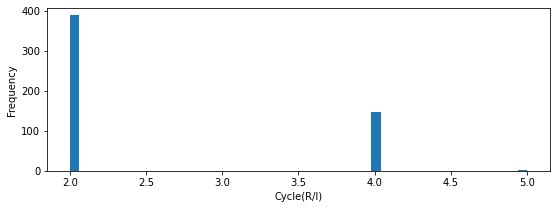

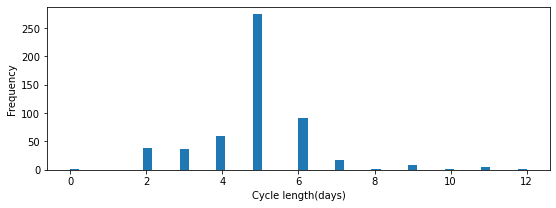

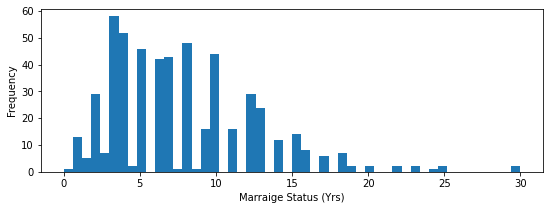

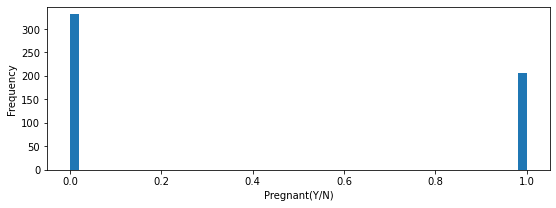

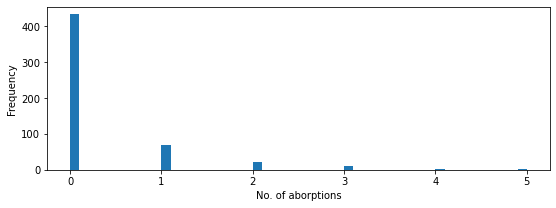

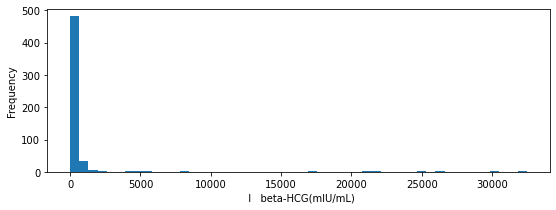

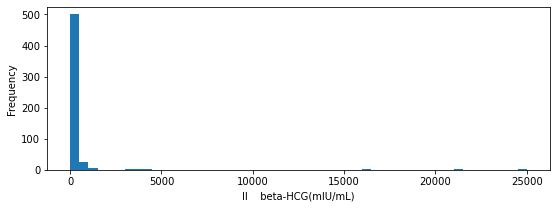

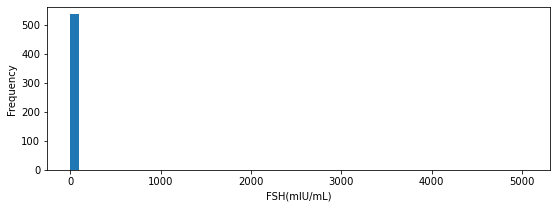

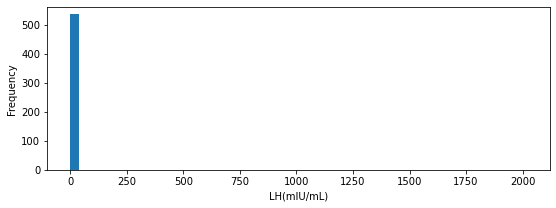

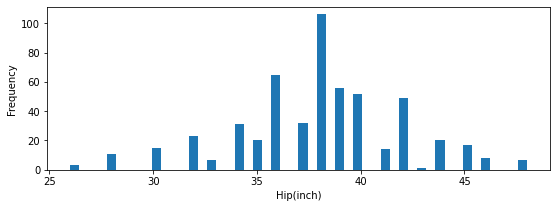

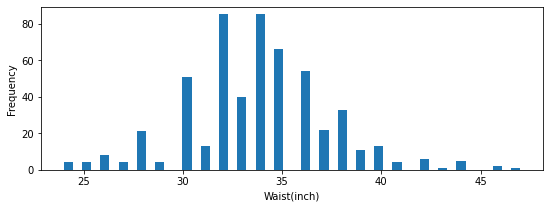

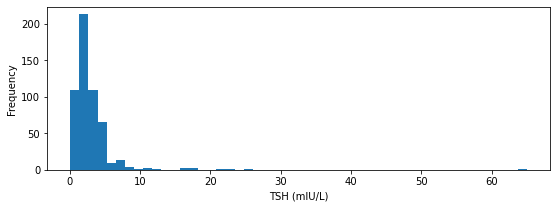

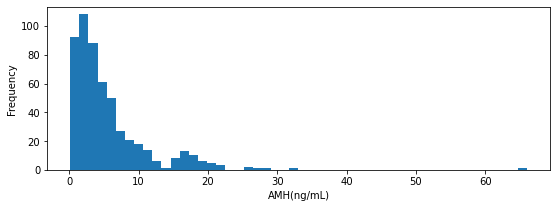

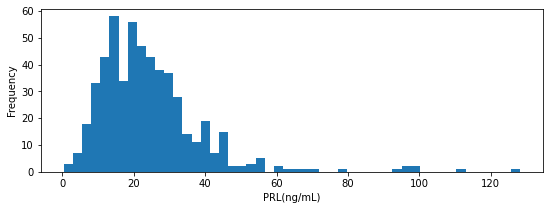

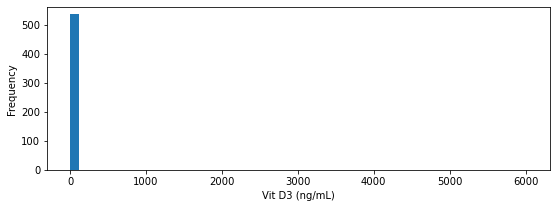

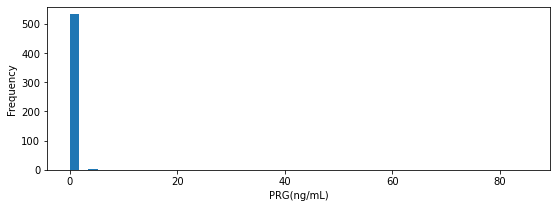

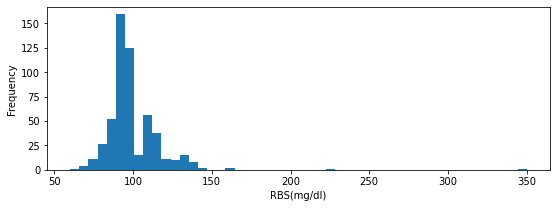

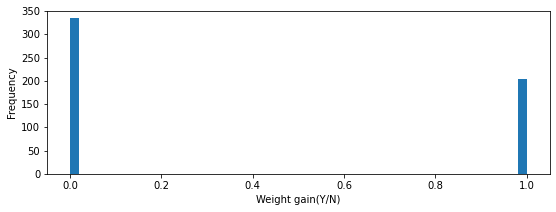

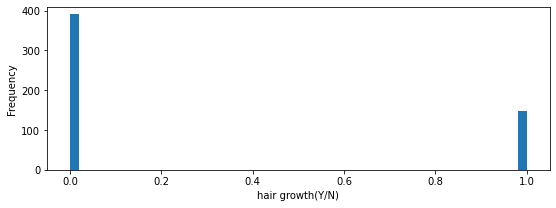

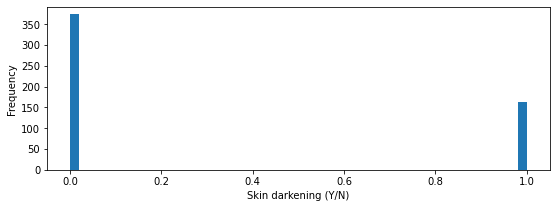

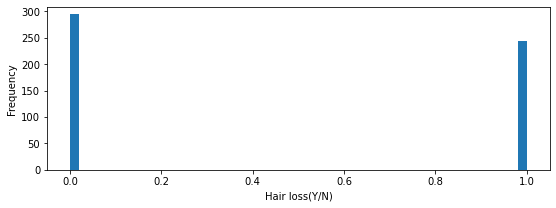

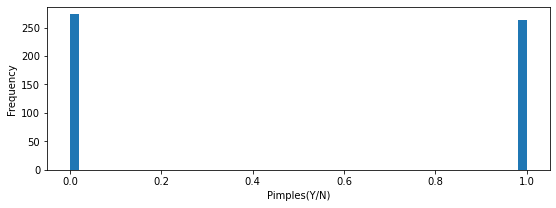

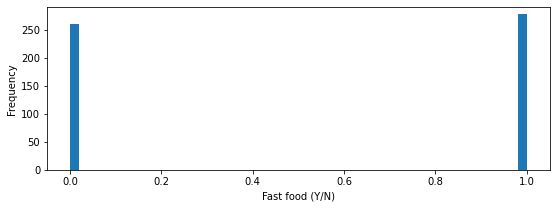

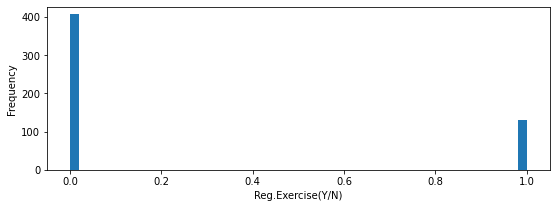

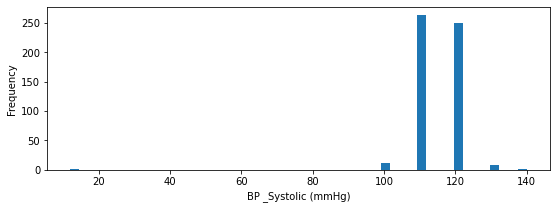

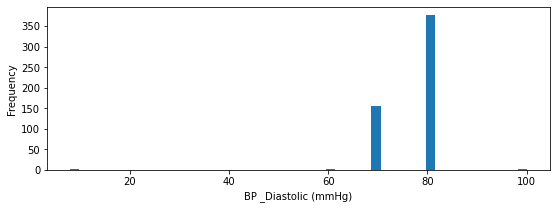

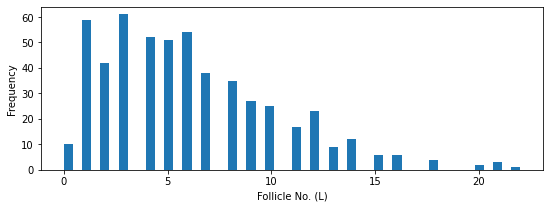

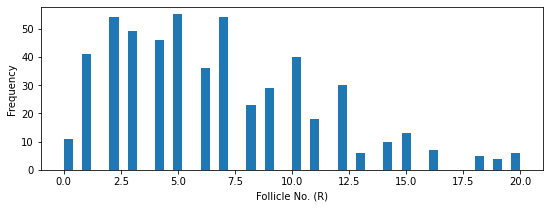

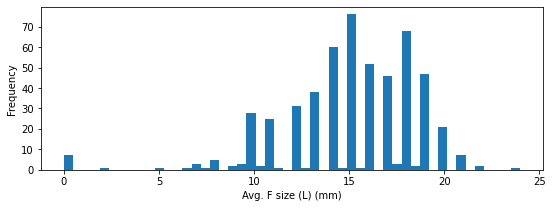

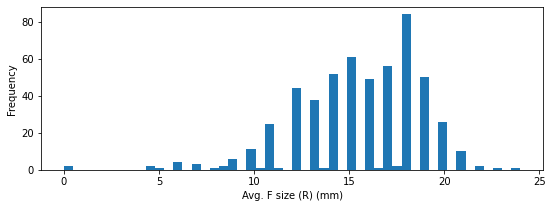

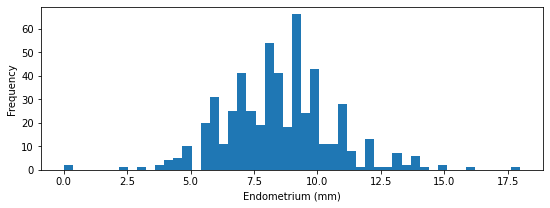

In [19]:
columns=[]
for i in df.columns:
    columns.append(i)
for n in columns[1:]:
    plot_hist(n)

In [17]:
df.corr()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,-0.167892,0.215770,0.068536,0.032041,0.092428,0.040696,0.089103,0.404407,-0.184275,...,0.293782,0.379460,0.067619,0.013286,0.037020,0.600376,0.649591,0.128089,0.093478,0.103203
Age (yrs),-0.167892,1.000000,-0.036331,-0.123408,-0.009980,0.046229,0.086863,-0.024951,-0.087494,0.053198,...,-0.037955,-0.031529,-0.020939,0.067092,0.063396,-0.111485,-0.154886,-0.018595,-0.081523,-0.095245
Weight (Kg),0.215770,-0.036331,1.000000,0.417932,0.073752,0.020722,0.043059,0.008012,0.200189,-0.004329,...,0.061802,0.166713,-0.059645,0.021703,0.125627,0.175596,0.130036,-0.020817,-0.073905,-0.003310
Height(Cm),0.068536,-0.123408,0.417932,1.000000,0.040767,-0.073352,-0.032007,0.025162,-0.023048,0.007663,...,0.063074,0.034854,0.019191,-0.073024,0.006616,0.105000,0.078651,-0.025785,0.059367,-0.052782
Blood Group,0.032041,-0.009980,0.073752,0.040767,1.000000,0.047681,-0.021840,-0.001150,0.124151,-0.008507,...,0.041623,-0.035985,0.066088,0.033797,0.053151,0.057675,0.012499,-0.038653,-0.018093,-0.017570
Pulse rate(bpm),0.092428,0.046229,0.020722,-0.073352,0.047681,1.000000,0.306067,-0.052675,0.103650,0.006805,...,-0.004090,0.059462,-0.039721,-0.024489,0.008081,0.041279,0.048813,-0.048968,-0.034296,-0.041175
RR (breaths/min),0.040696,0.086863,0.043059,-0.032007,-0.021840,0.306067,1.000000,-0.039286,0.011935,0.005813,...,0.031060,0.139043,-0.051965,0.011326,0.055728,0.071193,0.014842,-0.028086,-0.020156,-0.064253
Hb(g/dl),0.089103,-0.024951,0.008012,0.025162,-0.001150,-0.052675,-0.039286,1.000000,0.039985,-0.052527,...,0.050383,0.078138,0.013377,0.052250,-0.000491,0.063084,0.074720,0.031553,0.023898,-0.062364
Cycle(R/I),0.404407,-0.087494,0.200189,-0.023048,0.124151,0.103650,0.011935,0.039985,1.000000,-0.204699,...,0.128393,0.210300,-0.004533,0.049707,0.081369,0.295138,0.255592,0.035379,0.015865,0.041903
Cycle length(days),-0.184275,0.053198,-0.004329,0.007663,-0.008507,0.006805,0.005813,-0.052527,-0.204699,1.000000,...,-0.049341,-0.077316,0.029189,-0.012909,-0.078975,-0.092525,-0.160995,-0.056890,-0.017658,-0.014820


In [18]:
corr_matrix= df.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr_matrix, annot = True, fmt = ".2f");
plt.title("Correlation Between Features")
plt.show()

C:\Users\rumma\AppData\Local\Temp/ipykernel_39244/3740418002.py:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [12]:
#Dropping columns having value less than 0.1
df = df.drop(columns=['Cycle length(days)','Marraige Status (Yrs)','Pregnant(Y/N)','No. of aborptions','FSH(mIU/mL)','TSH (mIU/L)','PRG(ng/mL)'])

In [13]:
df = df.drop(columns=[' Age (yrs)'])

In [14]:
df.head()

,PCOS (Y/N),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,44.6,152.0,15,78,22,10.48,2,1.99,1.99,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,65.0,161.5,15,74,20,11.70,2,60.80,1.99,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,68.8,165.0,11,72,18,11.80,2,494.08,494.08,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,65.0,148.0,13,72,20,12.00,2,1.99,1.99,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,52.0,161.0,11,72,18,10.00,2,801.45,801.45,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [15]:
df.corr()

,PCOS (Y/N),Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
PCOS (Y/N),1.000000,0.215770,0.068536,0.032041,0.092428,0.040696,0.089103,0.404407,-0.027598,0.013228,...,0.293782,0.379460,0.067619,0.013286,0.037020,0.600376,0.649591,0.128089,0.093478,0.103203
Weight (Kg),0.215770,1.000000,0.417932,0.073752,0.020722,0.043059,0.008012,0.200189,0.015114,-0.001016,...,0.061802,0.166713,-0.059645,0.021703,0.125627,0.175596,0.130036,-0.020817,-0.073905,-0.003310
Height(Cm),0.068536,0.417932,1.000000,0.040767,-0.073352,-0.032007,0.025162,-0.023048,0.061974,0.036569,...,0.063074,0.034854,0.019191,-0.073024,0.006616,0.105000,0.078651,-0.025785,0.059367,-0.052782
Blood Group,0.032041,0.073752,0.040767,1.000000,0.047681,-0.021840,-0.001150,0.124151,-0.035364,-0.011142,...,0.041623,-0.035985,0.066088,0.033797,0.053151,0.057675,0.012499,-0.038653,-0.018093,-0.017570
Pulse rate(bpm),0.092428,0.020722,-0.073352,0.047681,1.000000,0.306067,-0.052675,0.103650,-0.020506,-0.016337,...,-0.004090,0.059462,-0.039721,-0.024489,0.008081,0.041279,0.048813,-0.048968,-0.034296,-0.041175
RR (breaths/min),0.040696,0.043059,-0.032007,-0.021840,0.306067,1.000000,-0.039286,0.011935,-0.084935,-0.038773,...,0.031060,0.139043,-0.051965,0.011326,0.055728,0.071193,0.014842,-0.028086,-0.020156,-0.064253
Hb(g/dl),0.089103,0.008012,0.025162,-0.001150,-0.052675,-0.039286,1.000000,0.039985,-0.017111,-0.094873,...,0.050383,0.078138,0.013377,0.052250,-0.000491,0.063084,0.074720,0.031553,0.023898,-0.062364
Cycle(R/I),0.404407,0.200189,-0.023048,0.124151,0.103650,0.011935,0.039985,1.000000,0.063923,0.028784,...,0.128393,0.210300,-0.004533,0.049707,0.081369,0.295138,0.255592,0.035379,0.015865,0.041903
I beta-HCG(mIU/mL),-0.027598,0.015114,0.061974,-0.035364,-0.020506,-0.084935,-0.017111,0.063923,1.000000,0.533638,...,-0.011749,0.025387,0.041985,-0.082511,0.003060,0.048923,0.018832,0.050242,0.071987,-0.051059
II beta-HCG(mIU/mL),0.013228,-0.001016,0.036569,-0.011142,-0.016337,-0.038773,-0.094873,0.028784,0.533638,1.000000,...,-0.020694,-0.019378,-0.032903,-0.059629,0.003498,0.065063,0.037917,0.000232,0.037376,0.017865


In [16]:
#devide the datset in x and y
x = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']

In [17]:
x

,Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),LH(mIU/mL),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,44.6,152.000,15,78,22,10.48,2,1.99,1.99,3.68,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,65.0,161.500,15,74,20,11.70,2,60.80,1.99,1.09,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,68.8,165.000,11,72,18,11.80,2,494.08,494.08,0.88,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,65.0,148.000,13,72,20,12.00,2,1.99,1.99,2.36,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,52.0,161.000,11,72,18,10.00,2,801.45,801.45,0.90,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,50.0,164.592,17,72,16,11.00,2,1.99,1.99,1.81,...,0,0.0,0,110,70,1,0,17.5,10.0,6.7
537,63.2,158.000,15,72,18,10.80,2,80.13,1.99,2.84,...,0,0.0,0,110,70,9,7,19.0,18.0,8.2
538,54.0,152.000,13,74,20,10.80,2,1.99,1.99,2.78,...,0,0.0,0,110,80,1,0,18.0,9.0,7.3
539,50.0,150.000,15,74,20,12.00,4,292.92,1.99,4.33,...,1,0.0,0,110,70,7,6,18.0,16.0,11.5


In [18]:
x.columns

Index(['Weight (Kg)', 'Height(Cm) ', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'RBS(mg/dl)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [18]:
x.columns

Index(['Weight (Kg)', 'Height(Cm) ', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'RBS(mg/dl)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [19]:
x = x.drop(columns=['Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)'])

In [24]:
# ProfileReport(x)

In [25]:
# df

In [26]:
# df.columns

In [27]:
# df['Blood Group'].unique()

In [32]:
# df_numeric = df.drop(columns=['BP _Diastolic (mmHg)','BP _Systolic (mmHg)','Reg.Exercise(Y/N)','Fast food (Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)','Cycle(R/I)','RR (breaths/min)','Blood Group','PCOS (Y/N)','Hair loss(Y/N)','Skin darkening (Y/N)','Pimples(Y/N)'])

In [33]:
# df_categorical = df[['BP _Diastolic (mmHg)','BP _Systolic (mmHg)','Reg.Exercise(Y/N)','Fast food (Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)','Cycle(R/I)','RR (breaths/min)','Blood Group','Hair loss(Y/N)','Skin darkening (Y/N)','Pimples(Y/N)']]

In [34]:
# df_categorical

In [35]:
# df_numeric

In [36]:
# #Standardization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_numeric = scaler.fit_transform(df_numeric)
# df_scaled = pd.DataFrame(scaled_numeric,columns=df_numeric.columns)

In [37]:
# df_scaled

In [38]:
# x = df_scaled
# x[['BP _Diastolic (mmHg)','BP _Systolic (mmHg)','Reg.Exercise(Y/N)','Fast food (Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)','Cycle(R/I)','RR (breaths/min)','Blood Group','Hair loss(Y/N)','Skin darkening (Y/N)','Pimples(Y/N)']] = df_categorical[['BP _Diastolic (mmHg)','BP _Systolic (mmHg)','Reg.Exercise(Y/N)','Fast food (Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)','Cycle(R/I)','RR (breaths/min)','Blood Group','Hair loss(Y/N)','Skin darkening (Y/N)','Pimples(Y/N)']]

In [39]:
# x

In [40]:
# len(x)

In [41]:
# x.isna().sum()

In [42]:
# df_scaled = x
# df_scaled['PCOS (Y/N)'] = y
# df_scaled

In [43]:
# df_scaled = df_scaled.dropna()

In [44]:
# x = df_scaled.drop(columns=['PCOS (Y/N)'])
# x

In [45]:
# y = df_scaled['PCOS (Y/N)']
# y

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30 , random_state = 0)

In [21]:
x_train

,Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),LH(mIU/mL),...,Waist(inch),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),RBS(mg/dl),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
125,54.0,155.0,13,72,22,10.8,2,363.13,2.80,0.78,...,33,2.40,33.51,13.50,92.0,7,6,18.0,17.0,12.0
155,49.3,158.0,15,76,18,12.5,4,1.99,1.99,3.13,...,35,8.75,44.27,9.60,73.0,7,7,14.0,16.0,7.5
389,50.0,155.0,15,72,18,10.8,4,2.00,2.00,5.98,...,32,2.90,30.85,21.10,92.0,3,5,15.0,12.0,11.2
59,67.0,137.0,15,74,20,11.0,4,1.99,1.99,2.73,...,39,2.36,15.19,45.35,92.0,5,7,14.0,15.0,11.0
235,58.1,153.0,13,72,18,12.4,2,418.82,1.99,1.48,...,34,1.30,27.73,31.10,86.0,0,5,17.0,18.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,54.0,150.0,13,72,18,10.2,2,4.42,1.99,0.72,...,33,1.01,15.64,42.36,92.0,5,2,11.5,4.7,6.5
279,54.0,150.0,11,72,18,12.0,4,184.80,1.99,3.91,...,34,21.00,29.69,20.10,125.0,3,2,15.0,13.0,9.0
9,52.0,150.0,15,80,20,10.0,4,1.99,1.99,1.51,...,38,1.61,11.74,27.70,125.0,1,1,14.0,17.0,2.5
362,50.0,161.0,15,74,16,10.0,4,14.83,53.82,0.67,...,32,1.60,23.58,21.30,82.0,1,1,14.0,13.0,9.2


In [22]:
x_test

,Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),LH(mIU/mL),...,Waist(inch),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),RBS(mg/dl),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
174,60.0,152.0,11,72,18,11.7,2,698.20,523.60,5.10,...,32,2.01,10.78,17.10,91.0,1,1,10.0,11.0,5.0
470,52.0,149.0,13,80,20,12.0,4,1.98,8.00,6.37,...,32,0.91,19.21,12.30,100.0,8,10,17.0,20.0,7.0
198,49.0,154.0,11,72,20,11.2,2,689.10,355.28,3.81,...,32,2.04,23.24,47.36,92.0,6,4,10.0,14.0,6.0
419,58.0,154.0,15,72,18,11.0,2,1.99,1.99,2.46,...,32,4.80,26.39,25.40,92.0,3,3,13.0,15.0,7.8
537,63.2,158.0,15,72,18,10.8,2,80.13,1.99,2.84,...,32,5.60,21.09,23.00,108.0,9,7,19.0,18.0,8.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,56.0,160.0,11,70,20,11.1,2,1.99,181.23,2.42,...,30,11.00,21.87,16.90,110.0,9,6,19.0,14.0,8.0
364,48.0,158.0,15,72,20,10.8,2,650.71,1.99,3.64,...,30,6.40,29.56,24.60,110.0,3,3,16.0,15.0,9.0
303,57.0,148.0,15,72,20,10.0,2,1.99,1.90,1.41,...,28,18.00,35.03,31.20,80.0,10,12,15.0,14.0,9.0
245,57.0,153.0,15,73,18,12.0,2,353.60,45.90,1.29,...,35,6.20,23.09,30.10,106.0,8,10,17.0,18.0,9.0


In [23]:
#SMOTE

In [24]:
# unique ,count = np.unique(y_train , return_counts=True)
# y_train_dict_value_count = { k:v for (k,v) in zip(unique,count)}
# y_train_dict_value_count

In [46]:
# from collections import Counter
# counter = Counter(y_train)
# print(counter)

In [47]:
# from imblearn.over_sampling import SMOTE

In [48]:
# sm = SMOTE(random_state=42)
# x_train, y_train = sm.fit_resample(x_train, y_train)

In [49]:
# counter = Counter(y_train)
# counter

In [50]:
x_train

,Weight (Kg),Height(Cm),Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),LH(mIU/mL),...,Waist(inch),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),RBS(mg/dl),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
125,54.0,155.0,13,72,22,10.8,2,363.13,2.80,0.78,...,33,2.40,33.51,13.50,92.0,7,6,18.0,17.0,12.0
155,49.3,158.0,15,76,18,12.5,4,1.99,1.99,3.13,...,35,8.75,44.27,9.60,73.0,7,7,14.0,16.0,7.5
389,50.0,155.0,15,72,18,10.8,4,2.00,2.00,5.98,...,32,2.90,30.85,21.10,92.0,3,5,15.0,12.0,11.2
59,67.0,137.0,15,74,20,11.0,4,1.99,1.99,2.73,...,39,2.36,15.19,45.35,92.0,5,7,14.0,15.0,11.0
235,58.1,153.0,13,72,18,12.4,2,418.82,1.99,1.48,...,34,1.30,27.73,31.10,86.0,0,5,17.0,18.0,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,54.0,150.0,13,72,18,10.2,2,4.42,1.99,0.72,...,33,1.01,15.64,42.36,92.0,5,2,11.5,4.7,6.5
279,54.0,150.0,11,72,18,12.0,4,184.80,1.99,3.91,...,34,21.00,29.69,20.10,125.0,3,2,15.0,13.0,9.0
9,52.0,150.0,15,80,20,10.0,4,1.99,1.99,1.51,...,38,1.61,11.74,27.70,125.0,1,1,14.0,17.0,2.5
362,50.0,161.0,15,74,16,10.0,4,14.83,53.82,0.67,...,32,1.60,23.58,21.30,82.0,1,1,14.0,13.0,9.2


In [51]:
# #Standardization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)

In [25]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log = LogisticRegression (random_state = 0)
log.fit(x_train,y_train)
log.score(x_test, y_test)

C:\Users\rumma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8580246913580247

In [53]:
# # Test the accuracy of the model on the testing data using a confusion matrix
# from sklearn. metrics import confusion_matrix
# for i in range(len(model) ) :
#         cm = confusion_matrix(Y_test, model[i]. predict(X_test) )

#         TP = cm[ 1 ] [ 1 ]
#         TN = cm[ 0] [0]
#         FN = cm[ 1] [0]
#         FP = cm[ 0 ] [ 1]
#         print (cm)

#         print ( 'Testing Accuracy = ', (TP + TN) / (TP + TN + FP + FN) )

In [54]:
from sklearn. metrics import confusion_matrix
cm = confusion_matrix(y_test, log.predict(x_test) )
TP = cm[1][1]
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
print (cm)
print ( 'Testing Accuracy = ', (TP + TN) / (TP + TN + FP + FN) )

[[97 11]
 [12 42]]
Testing Accuracy =  0.8580246913580247


In [47]:
x_test.iloc[:1,:]['Hip(inch)']

174    38
Name: Hip(inch), dtype: int64

In [43]:
x_test.iloc[:1,:].values

array([[ 60.  , 152.  ,  11.  ,  72.  ,  18.  ,  11.7 ,   2.  , 698.2 ,
        523.6 ,   5.1 ,  38.  ,  32.  ,   2.01,  10.78,  17.1 ,  91.  ,
          1.  ,   1.  ,  10.  ,  11.  ,   5.  ]])

In [36]:
y_test

174    0
470    1
198    0
419    0
537    0
      ..
440    0
364    0
303    1
245    1
254    0
Name: PCOS (Y/N), Length: 162, dtype: int64

In [44]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 174 to 254
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Weight (Kg)             162 non-null    float64
 1   Height(Cm)              162 non-null    float64
 2   Blood Group             162 non-null    int64  
 3   Pulse rate(bpm)         162 non-null    int64  
 4   RR (breaths/min)        162 non-null    int64  
 5   Hb(g/dl)                162 non-null    float64
 6   Cycle(R/I)              162 non-null    int64  
 7     I   beta-HCG(mIU/mL)  162 non-null    float64
 8   II    beta-HCG(mIU/mL)  162 non-null    float64
 9   LH(mIU/mL)              162 non-null    float64
 10  Hip(inch)               162 non-null    int64  
 11  Waist(inch)             162 non-null    int64  
 12  AMH(ng/mL)              162 non-null    float64
 13  PRL(ng/mL)              162 non-null    float64
 14  Vit D3 (ng/mL)          162 non-null    

In [26]:
#SVM
from sklearn.svm import SVC # "Support vector classifier"  
dt_model_svm = SVC(kernel='linear', random_state=0)
dt_model_svm .fit(x_train ,y_train)
dt_model_svm .score(x_test ,y_test)

0.8827160493827161

In [27]:
#DECision Tree
from sklearn.tree import DecisionTreeClassifier
dt_model_p = DecisionTreeClassifier()
dt_model_p.fit(x_train,y_train)
dt_model_p.score(x_test,y_test)

0.8641975308641975

In [28]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators = 500, criterion = 'entropy' , random_state = 0,max_features="sqrt")
forest.fit (x_train, y_train)
forest.score (x_test, y_test)

0.8827160493827161

In [72]:
# x_test.iloc[:1,:].to_csv('df_test_pcos.csv')

In [29]:
x_train.columns

Index(['Weight (Kg)', 'Height(Cm) ', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'RBS(mg/dl)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

In [30]:
len(x_train.columns)

21

In [73]:
import pickle

In [74]:
# save
with open('pcos_rf_model.pkl','wb') as f:
    pickle.dump(forest,f)

In [31]:
# load
with open('pcos_rf_model.pkl', 'rb') as f:
    forest = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'pcos_rf_model.pkl'

In [77]:
forest.score(x_test,y_test)

0.8827160493827161

In [58]:
from sklearn. metrics import confusion_matrix
cm = confusion_matrix(y_test, forest.predict(x_test) )
TP = cm[1][1]
TN = cm[0][0]
FN = cm[1][0]
FP = cm[0][1]
print (cm)
print ( 'Testing Accuracy = ', (TP + TN) / (TP + TN + FP + FN) )

[[99  9]
 [10 44]]
Testing Accuracy =  0.8827160493827161


In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [33]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

In [34]:
# predict probabilities
lr_probs = forest.predict_proba(x_test)

In [35]:
lr_probs

array([[0.92, 0.08],
       [0.4 , 0.6 ],
       [0.9 , 0.1 ],
       [0.92, 0.08],
       [0.82, 0.18],
       [0.84, 0.16],
       [0.4 , 0.6 ],
       [0.66, 0.34],
       [0.46, 0.54],
       [0.88, 0.12],
       [0.86, 0.14],
       [0.92, 0.08],
       [0.5 , 0.5 ],
       [0.72, 0.28],
       [0.22, 0.78],
       [0.14, 0.86],
       [0.3 , 0.7 ],
       [0.96, 0.04],
       [0.94, 0.06],
       [0.98, 0.02],
       [0.14, 0.86],
       [0.2 , 0.8 ],
       [0.84, 0.16],
       [0.8 , 0.2 ],
       [0.38, 0.62],
       [0.58, 0.42],
       [0.8 , 0.2 ],
       [0.86, 0.14],
       [0.84, 0.16],
       [0.84, 0.16],
       [0.72, 0.28],
       [0.82, 0.18],
       [0.82, 0.18],
       [0.26, 0.74],
       [0.96, 0.04],
       [0.18, 0.82],
       [0.86, 0.14],
       [0.94, 0.06],
       [0.3 , 0.7 ],
       [1.  , 0.  ],
       [0.94, 0.06],
       [0.68, 0.32],
       [0.4 , 0.6 ],
       [0.4 , 0.6 ],
       [0.88, 0.12],
       [0.44, 0.56],
       [0.42, 0.58],
       [0.26,

In [41]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs

array([0.24, 0.76, 0.06, 0.04, 0.24, 0.2 , 0.58, 0.28, 0.32, 0.22, 0.1 ,
       0.02, 0.26, 0.42, 0.92, 0.68, 0.9 , 0.08, 0.22, 0.  , 0.92, 0.94,
       0.32, 0.3 , 0.52, 0.58, 0.  , 0.58, 0.04, 0.14, 0.34, 0.1 , 0.16,
       0.8 , 0.  , 0.98, 0.08, 0.06, 0.94, 0.02, 0.22, 0.34, 0.9 , 0.6 ,
       0.04, 0.64, 0.3 , 0.88, 0.48, 0.42, 0.34, 0.  , 0.54, 0.86, 0.02,
       0.54, 0.02, 0.06, 0.  , 0.08, 0.66, 0.06, 0.06, 0.18, 0.6 , 0.02,
       0.7 , 0.04, 0.  , 0.28, 0.58, 0.4 , 0.06, 0.68, 0.46, 0.28, 0.9 ,
       0.42, 0.08, 0.56, 0.04, 0.04, 0.26, 0.52, 0.  , 0.94, 0.  , 0.74,
       0.8 , 0.96, 0.  , 0.02, 0.42, 0.14, 0.22, 0.02, 0.5 , 0.9 , 0.16,
       0.3 , 0.12, 0.12, 0.36, 0.94, 0.22, 0.06, 0.1 , 0.42, 0.48, 0.84,
       0.74, 0.18, 0.68, 0.08, 0.34, 0.02, 0.16, 0.1 , 0.84, 0.36, 0.1 ,
       0.42, 0.24, 0.04, 0.  , 0.04, 0.68, 0.02, 0.28, 0.1 , 0.68, 0.32,
       0.14, 0.12, 0.06, 0.94, 0.06, 0.1 , 0.08, 0.2 , 0.76, 0.12, 0.14,
       0.6 , 0.1 , 0.  , 0.22, 0.02, 0.  , 0.02, 0.

In [25]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [26]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.950


In [27]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

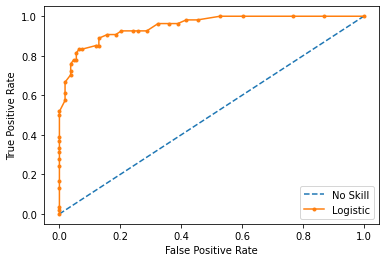

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

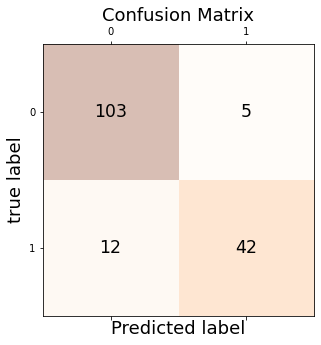

In [76]:
#Confusion matrix
y_pred = forest.predict(x_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('true label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
#confusion Matrix 

In [106]:
list_max_features = [None,"sqrt","log2"]

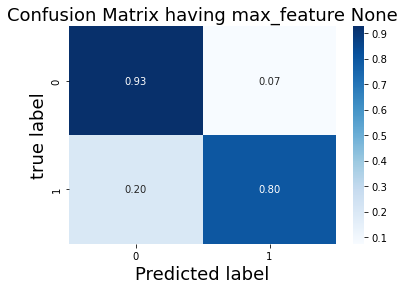

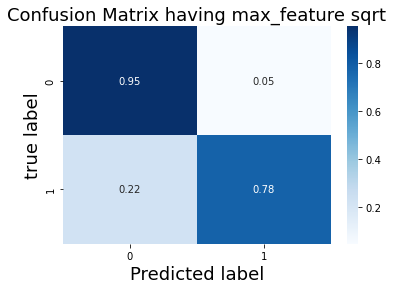

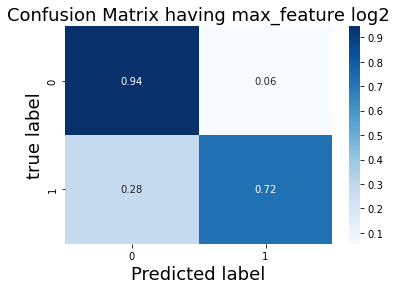

In [133]:
for i in list_max_features:
    #Random Forest Classifier(None)
    from sklearn.ensemble import RandomForestClassifier
    forest=RandomForestClassifier(n_estimators = 50, criterion = 'entropy' , random_state = 0,max_features=i)
    forest.fit (x_train, y_train)
    
    #Confusion matrix
    y_pred = forest.predict(x_test)
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred,labels=[0,1])
    heat_data = np.array([conf_matrix[0]/np.sum(conf_matrix[0]),conf_matrix[1]/np.sum(conf_matrix[1])])
    
    
    sns.heatmap(heat_data, annot=True, 
            fmt='.2f', cmap='Blues',)
    plt.xlabel('Predicted label', fontsize=18)
    plt.ylabel('true label', fontsize=18)
    plt.title(f'Confusion Matrix having max_feature {i}', fontsize=18)
    plt.show()

In [33]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score

print('Precision: %.3f' % precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Precision: 0.894
Recall: 0.778
F1 Score: 0.832
Accuracy: 0.895


In [34]:
#OOB error

In [70]:
from collections import OrderedDict
from sklearn.datasets import make_classification

In [71]:
RANDOM_STATE = 123


In [72]:
# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

In [73]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 200

In [74]:
for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(x, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

C:\Users\rumma\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\rumma\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\rumma\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


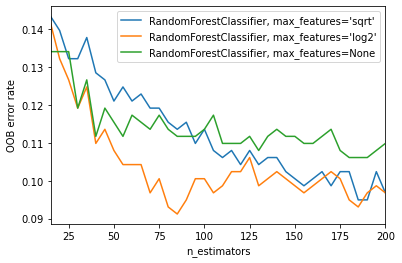

In [75]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [41]:
#Ensembled Learning
from sklearn.ensemble import VotingClassifier
logr = LogisticRegression(verbose=1)
classifier_p= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
dt_model_p = DecisionTreeClassifier()
# dt_model_svm = SVC(kernel='linear', random_state=0)  
model = VotingClassifier(estimators=[('rf', classifier_p), ('lr',logr),('dt', dt_model_p)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\rumma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


0.8827160493827161

In [42]:
#XGBoost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xg_boost = XGBClassifier(n_estimators=15)
xg_boost.fit(x_train, y_train)
xg_boost.score(x_test,y_test)

0.8827160493827161

In [43]:
#AdaBoost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=11)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8641975308641975

In [44]:
#GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
model_gb = GradientBoostingClassifier(n_estimators=10)
model_gb.fit(x_train, y_train)
model_gb.score(x_test,y_test)

0.8518518518518519

In [45]:
from sklearn.ensemble import HistGradientBoostingClassifier
model_gbh = HistGradientBoostingClassifier(learning_rate=0.02)
model_gbh.fit(x_train, y_train)
model_gbh.score(x_test,y_test)

0.8641975308641975

In [46]:
#lgbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train, y_train)
lgbm.score(x_test,y_test)

0.8827160493827161

In [59]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_test,y_test)

0.8395061728395061

In [72]:
#Neural Network

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout

In [54]:
#Model definition
model = Sequential()
model.add(Input(shape=(30,)))
model.add(Dense(1,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [55]:
#configure model training
model.compile(loss = 'binary_crossentropy' , optimizer = 'sgd' , metrics=['accuracy'])

In [56]:
#train_model
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
12/12 [==============================] - 1s 39ms/step - loss: 0.6915 - accuracy: 0.6773 - val_loss: 0.6897 - val_accuracy: 0.6667
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6880 - accuracy: 0.6773 - val_loss: 0.6865 - val_accuracy: 0.6667
Epoch 3/100
12/12 [==============================] - 0s 11ms/step - loss: 0.6846 - accuracy: 0.6773 - val_loss: 0.6834 - val_accuracy: 0.6667
Epoch 4/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6814 - accuracy: 0.6773 - val_loss: 0.6806 - val_accuracy: 0.6667
Epoch 5/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6784 - accuracy: 0.6773 - val_loss: 0.6778 - val_accuracy: 0.6667
Epoch 6/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6756 - accuracy: 0.6773 - val_loss: 0.6753 - val_accuracy: 0.6667
Epoch 7/100
12/12 [==============================] - 0s 9ms/step - loss: 0.6730 - accuracy: 0.6773 - val_loss: 0.6730 - val_accuracy: 0.6667
Epoch 8/